In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [18]:
data=pd.read_csv("GlobalWeatherRepository.csv")

In [19]:
data.head()

,country,location_name,latitude,longitude,wind_mph,wind_speed,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,visibility_miles,uv_index,gust_mph,Temperature (C)
0,Afghanistan,Kabul,34.52,69.18,7.2,11.5,74,ENE,1004,29.64,0.0,0.0,19,0,6,7,8.3,9.472222
1,Albania,Tirana,41.33,19.82,3.8,6.1,210,SSW,1006,29.71,0.0,0.0,54,75,6,6,7.4,9.355556
2,Algeria,Algiers,36.76,3.05,8.1,13.0,240,WSW,1014,29.94,0.0,0.0,30,25,6,7,3.4,9.377778
3,Andorra,Andorra La Vella,42.50,1.52,6.0,9.7,345,NNW,1015,29.97,0.0,0.0,51,6,6,4,7.4,8.288889
4,Angola,Luanda,-8.84,13.23,2.2,3.6,270,W,1016,30.00,0.0,0.0,69,75,6,6,3.6,8.755556


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           199 non-null    object 
 1   location_name     199 non-null    object 
 2   latitude          199 non-null    float64
 3   longitude         199 non-null    float64
 4   wind_mph          199 non-null    float64
 5   wind_speed        199 non-null    float64
 6   wind_degree       199 non-null    int64  
 7   wind_direction    199 non-null    object 
 8   pressure_mb       199 non-null    int64  
 9   pressure_in       199 non-null    float64
 10  precip_mm         199 non-null    float64
 11  precip_in         199 non-null    float64
 12  humidity          199 non-null    int64  
 13  cloud             199 non-null    int64  
 14  visibility_miles  199 non-null    int64  
 15  uv_index          199 non-null    int64  
 16  gust_mph          199 non-null    float64
 1

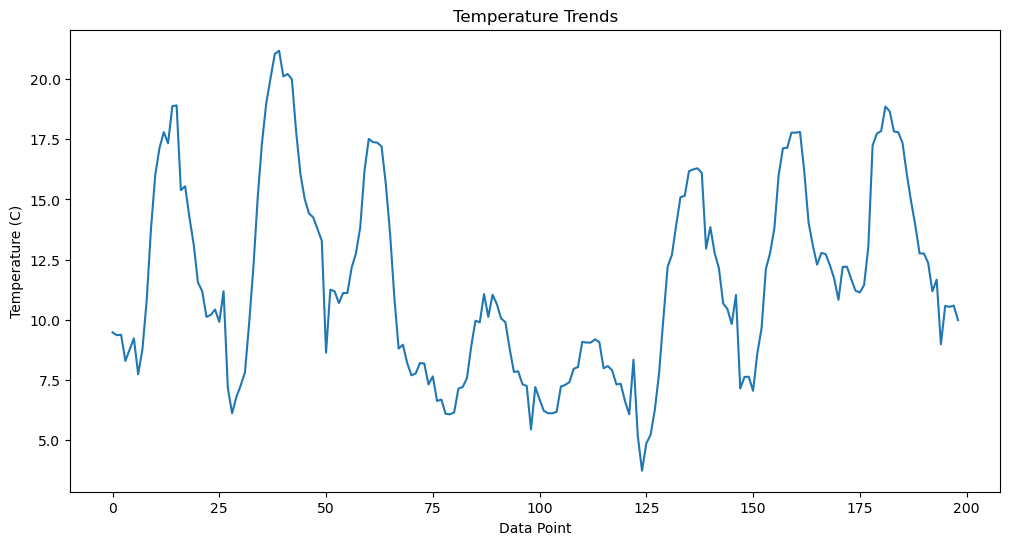

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='Temperature (C)')
plt.title("Temperature Trends")
plt.xlabel("Data Point")
plt.ylabel("Temperature (C)")
plt.show()


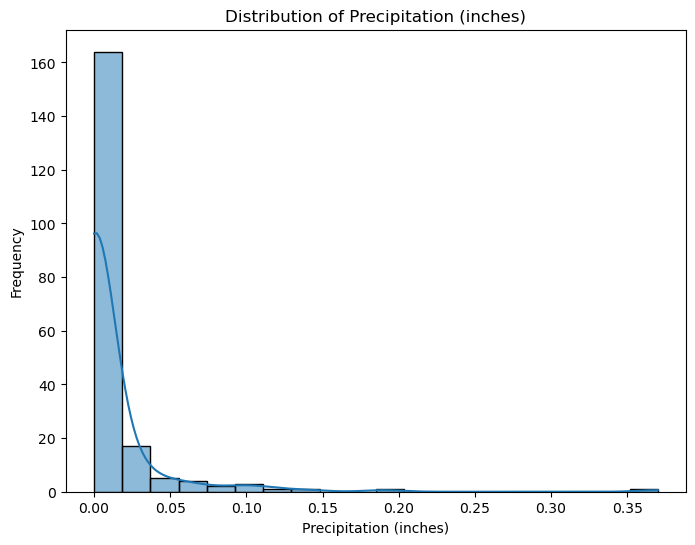

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='precip_in', bins=20, kde=True)
plt.title("Distribution of Precipitation (inches)")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Frequency")
plt.show()


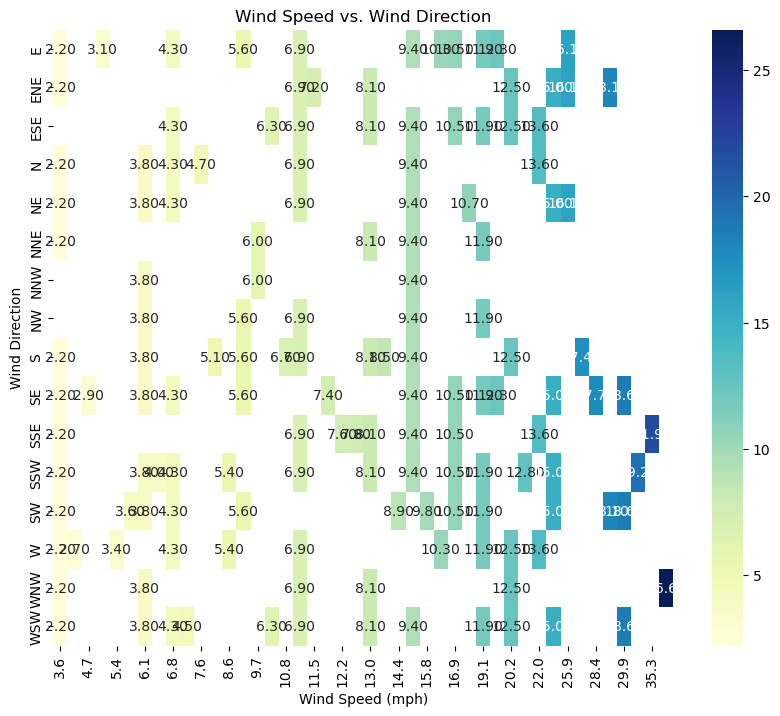

In [23]:
# Create a pivot table to summarize wind data by direction and speed.
wind_pivot = data.pivot_table(index='wind_direction', columns='wind_speed', values='wind_mph', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(wind_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Wind Speed vs. Wind Direction")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Wind Direction")
plt.show()


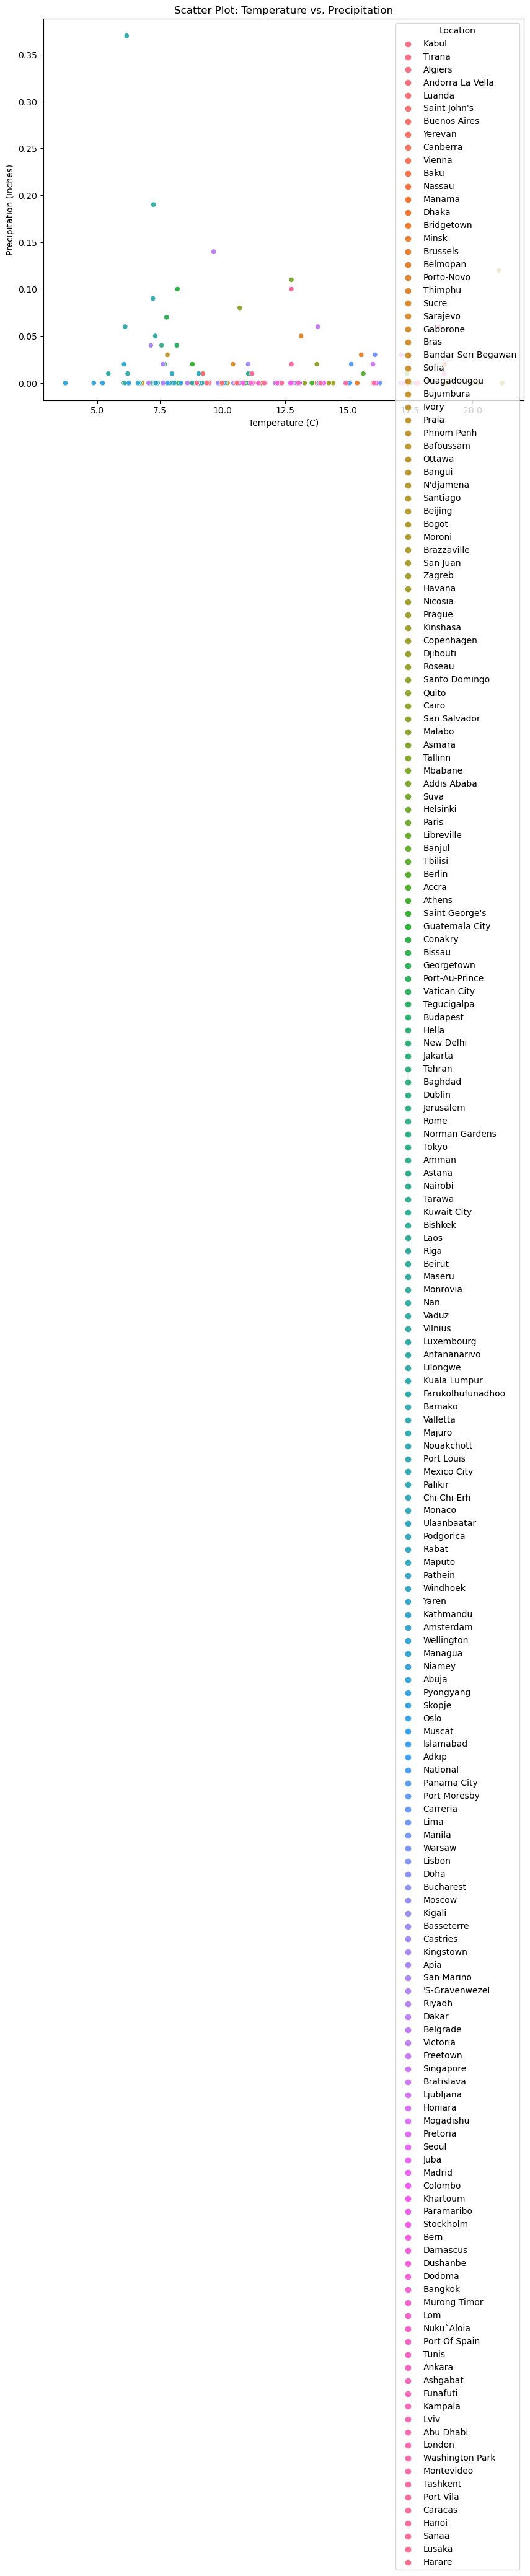

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="Temperature (C)", y="precip_in", hue="location_name")
plt.title("Scatter Plot: Temperature vs. Precipitation")
plt.xlabel("Temperature (C)")
plt.ylabel("Precipitation (inches)")
plt.legend(title="Location")
plt.show()


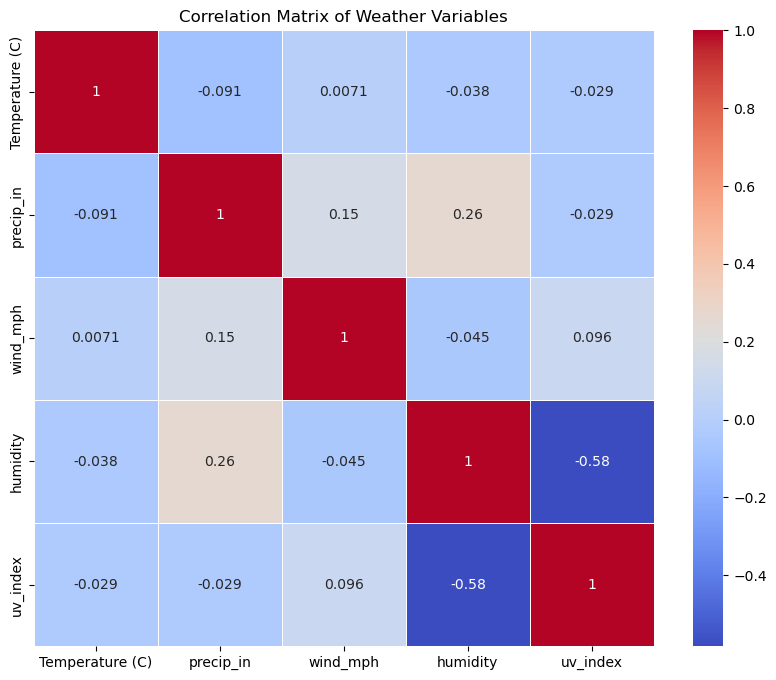

In [25]:
# Select only the columns with continuous data for correlation analysis.
continuous_data = data[["Temperature (C)", "precip_in", "wind_mph", "humidity", "uv_index"]]

# Calculate the correlation matrix.
correlation_matrix = continuous_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Weather Variables")
plt.show()


In [26]:
#end